# Calculation Summary Notebook for Experiment 2
In this notebook, we will use our data from day 1, experiment 2 in order to answer several key questions, recalling that the goal of this experiment is to standardize our HCl solution (i.e. determine a precise concentration for that soltion).
1. Does the choice of indicator dye change the result of this experiment when working in DI water?
2. Does the choice of indicator dye change the result of this experiment when working in seawater?
3. Using an indicator dye, is there a significant difference between the result in DI water and in seawater?
4. Is there a significant difference between the results in DI water when using an indicator dye vs. using a pH probe?
5. Is there a significant difference between the results in seawater when using an indicator dye vs. using a pH probe?

Consider what sort of information will be needed to make these decisions, and consider what the answers to these questions may tell you about our ability to precisely and accurately determine pH in high salinity environments like ocean water or the Salton Sea.

In this notebook, first we will address how to import and manage the data from your manual titrations. Then we will discuss how to import and process the results for the Hanna autotitrator. You will then need to apply your exisiting knowledge of statistical testing to answer the key questions.

In [13]:
## Import the class data from the provided .csv file
# RUN THIS BLOCK WITHOUT MAKING ANY CHANGES! JUST CHECK AND MAKE SURE THE DATA LOOKS CORRECT

# Just like we imported some extra math functions before, we're going to import some 
# extra statistical functions here
import math
import numpy as np
import scipy.stats as stats

#Don't worry too much about this code. It's reading in the file, and reorganizing it into lists based on the columns in the csv file

import pandas as pd
data = pd.read_csv("FA22_exp2.csv")
## BB_DI data
BBx = data['BB_DI'].tolist()
BB_DI = [x for x in BBx if pd.isnull(x) == False]
print(BB_DI)
# MR_DI data
MRx = data['MR_DI'].tolist()
MR_DI = [x for x in MRx if pd.isnull(x) == False]
print(MR_DI)

## BB_SW data
BBy = data['BB_SW'].tolist()
BB_SW = [x for x in BBy if pd.isnull(x) == False]
print(BB_SW)
# MR_DI data
MRy = data['MR_SW'].tolist()
MR_SW = [x for x in MRy if pd.isnull(x) == False]
print(MR_SW)



[0.1054, 0.1064, 0.1057, 0.118, 0.0904, 0.1013, 0.11, 0.108, 0.105]
[0.1138, 0.1074, 0.1095, 0.105, 0.105, 0.107, 0.118, 0.0982, 0.106, 0.1152, 0.118, 0.1105]
[0.105, 0.057, 0.0901, 0.103, 0.0982, 0.0926, 0.098, 0.0899]
[0.1013, 0.1046, 0.1058, 0.0999, 0.0998, 0.1, 0.114, 0.0993, 0.0922, 0.1026, 0.1056, 0.105]


In [15]:
# First, as always, we will want averages and standard deviations. 
# Note that the code above made lists for each column in the class data sheet. The variable names are the same as the column headings. 
# So, for example, the Bromothymol Blue data in DI water is saved in a list called BB_DI

x_BBdi = stats.tmean(BB_DI)
s_BBdi = stats.tstd(BB_DI)

# Be sure to fix this print statement to report the correct number of sig figs for your data!
print (F"the average HCl concentration calculated using bromothymol blue in DI water is {x_BBdi:.15f} +/- {s_BBdi:.15f}  M ")

# Complete the average and standard deviation code for the rest of the data sets




the average HCl concentration calculated using bromothymol blue in DI water is 0.105577777777778 +/- 0.007326796328850  M 


In [ ]:
# Next, get 95% condifence intervals for each data set. Remember, you can reuse code from previous assignments!


In [ ]:
# Now that you have averages and standard deviations for all the data, consider what statistical testing is needed to answer questions 1
# Write the necessary code here. Update the output of your final statistical tests to answer the question specifically.



In [ ]:
# Code to answer Question 2 goes here. Again, remember that you can always reuse code, but update the output statements appropraitely!


In [ ]:
# # Code to answer Question 3 goes here. Again, remember that you can always reuse code, but update the output statements appropraitely!


## Using the Hanna autotitrator data

Questions 1-3 could be addressed with the manual titration data only. Those results are providing details about the precision of the class' manual titrations.
In order to assess accuracy, we would need a "true" value, but we may not actually have a known value for this HCl solution. We know what it should be, based on the procedure when it was made, but it is several years old now, and issues of degradation, solvent evaporation, etc. are impossible for us to quantify. In this situation, we will turn to something we consider to be a more reliable (accurate and precise) measurement to provide a comparison measurement that we can use to assess accuracy. For us, that technique is the autotitration using a glass pH probe. So, to assess the accuracy of our results, we need to import that titration data and calculate the concentration of HCl based on that technique. Follow the instructions below to complete that process.

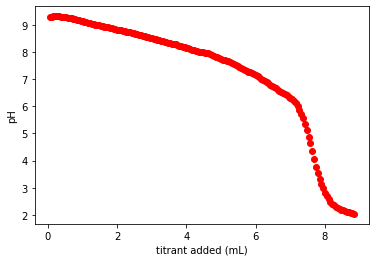

In [9]:
import matplotlib.pyplot as plt
#be sure the file name here is updated to reflect your group's actual .csv file!

csv = np.genfromtxt ('seawater2.csv', delimiter=",")
#convert the data to lists
#volume data
volume = csv[:,0]
#pH data
pH = csv[:,1]
#plot the data
plt.plot(volume, pH, 'ro')
# Add labels on the x and y axis, always including units.
plt.xlabel('titrant added (mL)')
plt.ylabel('pH')
#lets just take a look!
plt.show()

### Finding equivalence points

First, lets take a closer look at the data.

   1. Based on the graph above, do you think is acid is a monoprotic, diprotic or triprotic acid?

   2. How many equivalence points should we find?

   3. Can you see them? Estimate by eye approximately where you think those equivalence points are.


It can be hard to spot the equivalence points by eye, but we can manipulate this data to making it easier to find the equivalence point. The method we will use here is called the <b> first derivitive </b> method.

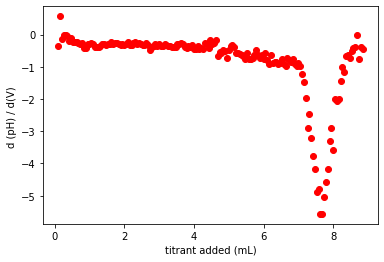

In [10]:
from numpy import diff
# take the derivitive of pH with respect to volume

dpHdV = diff(pH)/diff(volume)

volume_update = np.delete(volume, (0), axis=0)

plt.plot(volume_update, dpHdV, 'ro')

# Add labels on the x and y axis, always including units.
plt.xlabel('titrant added (mL)')
plt.ylabel('d (pH) / d(V) ')


#lets just take a look!
plt.show()

Notice that the sharp peaks are at the equivalence points! Remember, a derivitive is just a measure of how quickly your function is changing, so it is largest where the slope of the line is largest! This makes the equivalnce points a lot easier to see! 
We can automatically report the volume of the highest peak, using the <i> max </i>; but beware in polyprotic titrations, be sure to keep track of which equivalence point is being returned

In [11]:
# finding the index of the highest value in the first derivitive array
ind = np.argmin(dpHdV)

# finding the volume at the same index
endpoint_volume = volume_update[ind]

print (F"the endpoint volume is {endpoint_volume} mL")

the endpoint volume is 7.631578947 mL


Once you have an endpoint volume, determining the concentration of the HCl should be a fairly simple alegbra problem, using your known mass of Tris. Complete that math below to get a "true" value of the HCl concentration in water. Then repeat this process for the seawater file. 

In [ ]:
# Convert endpoint volume to concentration of HCl here


In [ ]:
# repeat this process for seawater. As always, reuse code, but be sure to update output statements!



## Questions 4 and 5

What statistical test do we use to compare a measured value to a "true value"? Use that method to answer questions 4 and 5:


In [ ]:
# Code for Question 4

In [ ]:
# Code for Question 5

# Post-Lab Questions
Be sure all results are being reported above with correct significant digits in clear descriptive print statements. Be sure you have answered all in text questions
Finally, reflect on the whole lab to answer the following questions:

1. Based on your results, which indicator dye would you recommend for use in future standardizations of HCl? Support your choice with data!
2. Based on our results, do you think that our indicator dyes are seriously impacted by the seawater samples? Why or why not?
3. Based on our results, do you think that our pH are seriously impacted by the seawater samples? Why or why not?
4. Why do we not directly compare the pH probe results for DI water and seawater using any of our statistical tests? 
5. Would you recommend using a pH probe or one of our indicator dyes when trying to measure pH in a seawater sample? Support your choice with data!
